## Question One

### a)

As is displayed by the histogram below, the data is skewed to the left indicated the majority of the area being burned is little to none. There are minimal extreme cases where a large area of the forest is burned. 

I reduced the amount of bins so the values were more easily observable.

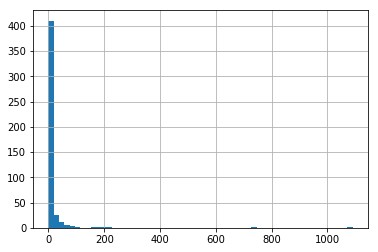

In [5]:
num_bins = math.ceil(len(fire_df.area.unique())/4)
hist = fire_df.area.hist(bins=num_bins)

### b)

In [6]:
%%capture
df_binary = fire_df.copy()
df_binary['area'] = fire_df.area.apply(lambda x: 0 if x == 0.0 else 1)
average_accuracy = k_fold_cross_validation(df_binary, 10)

In [7]:
average_accuracy

0.5043015726179464

### Functions for Question One

In [2]:
def k_fold(df, k):
    # randomly shuffle rows
    df = df.sample(frac=1).reset_index(drop=True)
    num_rows = df.shape[0]
    df['k_fold'] = np.repeat(np.nan, num_rows)
    num_extra_rows = num_rows % k
    if num_extra_rows != 0:
        num_rows_in_each_fold = math.floor(num_rows / k)
    else:
        num_rows_in_each_fold = num_rows / k
    if num_extra_rows > 0:
        last_slice = 0
        for fold in range(k):
            if fold < num_extra_rows:
                df.loc[fold * (num_rows_in_each_fold+1):(num_rows_in_each_fold+1)*(fold+1),\
                       'k_fold'] = fold
                last_slice = (num_rows_in_each_fold+1)*(fold+1)
            else:
                df.loc[last_slice:last_slice+num_rows_in_each_fold, 'k_fold'] = fold
                last_slice = last_slice+num_rows_in_each_fold
        return df
    else:
        for fold in range(k):
            df.loc[fold * (num_rows_in_each_fold):(num_rows_in_each_fold)*(fold+1),\
                   'k_fold'] = fold
        return df
    
    
    
def k_fold_cross_validation(df, k):
    # Split data into k folds
    df_k_fold = k_fold(df_binary, 10)
    
    # Empty list to store k accuracies
    accuracies = []
    for fold in range(k):
        # Split into training and test sets
        test_df = df_k_fold[df_k_fold.k_fold == fold]
        test_df_label = test_df.area
        test_df = test_df.drop(['area'], axis=1)
        train_df = df_k_fold[df_k_fold.k_fold != fold]
        train_df_label = train_df.area
        train_df = train_df.drop(['area'], axis=1)

        # Create logistic model and use it to classify test set
        logistic_classifier = LogisticRegression(random_state=0, solver='lbfgs',
                                 multi_class='multinomial').fit(train_df, train_df_label)
        accuracy = logistic_classifier.score(test_df, test_df_label)
        # Append accuracy of test set
        accuracies.append(accuracy)
    return sum(accuracies)/k

## Question 2

### i)

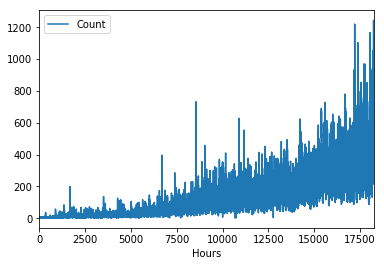

In [9]:
plot_ticket_data(tickets_df)

### ii.a)

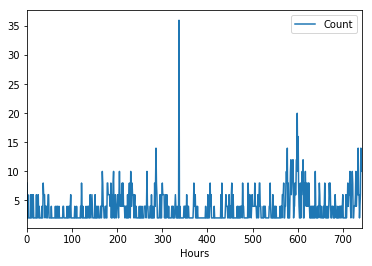

In [10]:
plot_specific_data(tickets_df, '24-09-2012 23:00')

### ii.b)

$l(\lambda) = \prod_{n=1}^{N} \frac{e^{-\lambda}\lambda^{x_n}}{x_n!}$

### ii.c)

$ -log(\prod_{n=1}^{N} \frac{e^{-\lambda}\lambda^{x_n}}{x_n!}) = $

$-\sum_{n=1}^N log(\frac{e^{-\lambda}\lambda^{x_n}}{x_n!}) = $

$-\sum_{n=1}^N (log(e^{-\lambda}) + log(\lambda^{x_n}) - log(x_n!)) = $

$-\sum_{n=1}^N (-\lambda + x_n log(\lambda) - log(x_n!)) = $

$N \lambda + \sum_{n=1}^N log(x_n!) - log(\lambda) \sum_{n=1}^N x_n $

### ii.d)

$\frac{d}{d \lambda } (N \lambda + \sum_{n=1}^N log(x_n!) - log(\lambda) \sum_{n=1}^N x_n ) = 0$

$ N - \frac{1}{\lambda} \sum_{n=1}^N x_n = 0$ 

$ (N) ^{-1} = (\frac{1}{\lambda} \sum_{n=1}^N x_n)^{-1} $

$\frac{1}{N} = \lambda \frac{1}{\sum_{n=1}^N x_n} $

$\lambda = \frac{1}{N} \sum_{n=1}^N x_n $

### ii.e)

In [11]:
lambda_val = solve_lambda(tickets_df, '24-09-2012 23:00')

lambda_val

3.7927321668909824

## Functions for Question Two

In [8]:
def plot_ticket_data(df):
    count_row = df.shape[0]
    
    df_copy = df.copy()
    
    hours = list(range(count_row))
    hours_df = pd.DataFrame({"Hours":hours})
    
    df_copy = df_copy.join(hours_df)
    df_copy.plot(x='Hours', y='Count')
    

def plot_specific_data(df, cutoff_date):
    count_row = df.shape[0]
    
    df_copy = df.copy()
    
    hours = list(range(count_row))
    hours_df = pd.DataFrame({"Hours":hours})
    
    df_copy = df_copy.join(hours_df)
    
    my_index = int(df_copy.loc[df_copy['Datetime'] == cutoff_date].index[0])
    
    df_copy.iloc[0:my_index].plot(x='Hours', y='Count')
    
    
def solve_lambda(df, end_index):
    my_index = int(df.loc[df['Datetime'] == end_index].index[0])

    month_tickets_df = (df.loc[0:my_index])
    summation_count = 0
    for element in month_tickets_df['Count']:
        summation_count += element

    lambda_val = (1/my_index) * summation_count

    return lambda_val

    


In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.linear_model import LogisticRegression

#Q1 data
fire_df = pd.read_csv('data.csv')
#Q2 data
tickets_df = pd.read_csv('question2-data.csv')